A Transactive Energy system may use an Orderbook to implemented a continuous market rather than a discrete-time double auction.  In an Orderbook, two lists of limit orders are maintained and market orders are filled in real-time.

Limit orders are used to inform the market of the availability of a resource to supply (sell) or consumer (buy) a specified quantity of service at a specified price for a specified duration.  

Market orders are used to obtain from the market an immediate commitment of a resource to supply (sell) or consume (buy) at the best price possible at the present time.

This document describes the types of orders and the market mechanisms needed to implement a Transactive Orderbook.

# Market Units

Each Orderbook tracks a product or service called the Unit.  In this document, we will use the unit of megaWatt (denoted MW) in the examples.  However, other units may also be supported. Time units can also be specified. The default quantity unit is "MW" and the default time unit is "h".  The default currency unit is "$".

# Order Parameters
Orders have a number of parameters associated that are used to characterize them.

## Quantity
The quantity associated with a particular order is always given in the Orderbook's unit. If the quantity is divisible, the order must indicate that.

## Duration
Every order has duration associated with it over which the order is expected to be filled. If the duration is divisible, then the order must indicate that. 

The total amount traded is always for the order quantity multiplied by the order duration.

## Price
The price associated with an order is always given per unit quantity per unit time.

## Divisibility
Order may be filled using multiple orders. However, if an order cannot be filled immediately, a divisible may be partly filled and the remainder of the order placed in the order book to be filled at the first opportunity.  To specify that an order must be filled in its entirety when it initially filled, it must be specified as indivisible by setting the divisibility flag to `False`.  By default sell orders are divisible, and buy orders are indivisible.

## Amount
The order amount is the product of the quantity filled multiplied by the duration over which it has been filled. Any portion of the quantity or duration that remains unfilled is left in the quantity and duration.

## Cost
The cost of an order is computed when the order is filled. The order cost is the total traded amount multiplied by the order price.  A positive amount is associated with a sell order at a positive price, and negative amount is associated with a buy order at a positive price.  Note that negative prices are permitted, but represent a market pathology associated with insufficient resources.

# Limit Orders

There are two types of limit orders in an Orderbook system: Buy Limit and Sell Limit.

## Buy Limit
A Buy Limit is an order to buy only if one or more sellers can be found who are willing to deliver the given amount (the quantity multipled by the duration) at the given price. A buy limit order remains in the book until it is canceled or it expires.

## Sell Limit
A Sell Limit is an order to sell only if one or more buyers can be found who are willing to consume the given amount (quantity multiplied by duration) at the given price. A sell limit order remains in the book until it is canceled or it expires.

# Market Orders
There are two types of market orders in an Orderbook system: Buy Market and Sell Market.

## Buy Market
A Buy Market is an order to buy a given amount immediately at the best available price. If the order cannot be filled immediately, the order is canceled.

## Sell Market
A Sell Market is an order sell a given amount immediately at the best available price.  If the order cannot be filled immediately, the order is canceled.

# Filling Orders
Orders are filled when they are received, if possible. The disposition of orders that cannot be filled immediately depends on the type of order; a limit order is placed on the books while a market order is cancelled.

When an order is filled, the quantity, duration, price, and value are set and the order status data is returned to the agent. Depending on the order parameters, the order may not be filled completely, or the order may be canceled.

## Filling Limit Orders
A limit order is filled immediately if a matching limit order in the other book can be found.  For example, if a Sell Limit is received for a price less than or equal to the highest Buy Limit order, then the Sell Limit order is filled with the corresponding Buy Limit order.  If the order quantity is divisible, then this process is continued until the Sell Limit order is completely filled or there are no remaining Buy Limit orders that match at the given price. The balance of the limit order is left on the books to be filled at a later date. If the order quantity is not divisible, then the order must be filled completely, otherwise it must be placed in the book to be filled later.

### Examples
To run the python examples, you must load the `orderbook.py` module

In [1]:
import orderbook as ob
help('orderbook')

Help on module orderbook:

NAME
    orderbook

CLASSES
    builtins.dict(builtins.object)
        order
    builtins.object
        orderbook
    builtins.str(builtins.object)
        ordertype
    
    class order(builtins.dict)
     |  order(**kwargs)
     |  
     |  Implementation of order
     |  
     |  Method resolution order:
     |      order
     |      builtins.dict
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __lt__(self, a)
     |      Return self<value.
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  add_amount(self, x)
     |      Add to order amount
     |  
     |  add_quantity(self, x)
     |      Add to order quantity
     |  
     |  add_value(self, x)
     |      Add to order value
     |  
     |  get_divisible(self)
     |      Get order divisibility flag
     |  
     |  get_p

This example creates one order of each type. Note that by default sell orders are divisible and buy orders are not divisible.

In [2]:
print(ob.order(order_type="BUYLIMIT",quantity=10.0,price=10.0,duration=1.0))
print(ob.order(order_type="SELLLIMIT",quantity=10.0,price=10.0,duration=1.0))
print(ob.order(order_type="BUYMARKET",quantity=5.0, duration=1.0))
print(ob.order(order_type="SELLMARKET",quantity=5.0, duration=1.0))
print(ob.order(order_type="CANCEL",quantity=1.0,duration=1.0))

<order:0/BUYLIMIT 10.0 at 10.0 for 1.0>
<order:1/SELLLIMIT 10.0 at 10.0 for 1.0>
<order:2/BUYMARKET 5.0 at 1.0>
<order:3/SELLMARKET 5.0 at 1.0>
<order:4/CANCEL 1.0 at 1.0>


This example builds buy and sell books and displays them visually.  The x-axis is the price, and the y-axis is the cumulative quantity.

{"buy": [{"quantity": 1.5, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 2.0, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "using": [], "fees": 0.0, "settled": []}


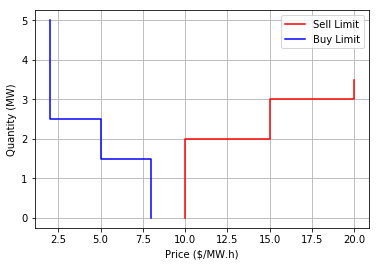

In [3]:
market = ob.orderbook()
market.ask(quantity=2.0, duration=1.0, price=10.0)
market.ask(quantity=1.0, duration=1.0, price=15.0)
market.ask(quantity=0.5, duration=1.0, price=20.0)
market.bid(quantity=1.5, duration=1.0, price=8.0)
market.bid(quantity=1.0, duration=1.0, price=5.0)
market.bid(quantity=2.5, duration=1.0, price=2.0)
print(market)
graph = market.plot(using={"grid":"","legend":"['Sell Limit','Buy Limit']"})

The following adds a sell limit order that can be satisfied by the highest buy limit order.

{"buy": [{"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 2.0, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "using": {"grid": "", "legend": "['Sell Limit','Buy Limit']"}, "fees": 0.0, "settled": [{"quantity": 0.0, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 1.5, "value": -10.5, "divisible": false}, {"quantity": 0.0, "duration": 1.0, "price": 7.0, "id": 11, "o

{'sell': [[<matplotlib.lines.Line2D at 0x10f31c2e8>]],
 'buy': [[<matplotlib.lines.Line2D at 0x10f279dd8>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

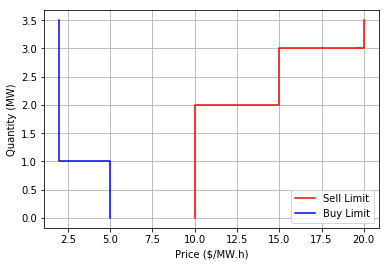

In [4]:
market.ask(quantity=1.5,duration=1.0,price=7.0)
print(market)
market.plot()

{"buy": [{"quantity": 1.0, "duration": 1.0, "price": 5.0, "id": 9, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}, {"quantity": 2.5, "duration": 1.0, "price": 2.0, "id": 10, "ordertype": "BUYLIMIT", "amount": 0.0, "value": 0.0, "divisible": false}], "sell": [{"quantity": 0.5, "duration": 1.0, "price": 10.0, "id": 5, "ordertype": "SELLLIMIT", "amount": 1.5, "value": 16.5, "divisible": true}, {"quantity": 1.0, "duration": 1.0, "price": 15.0, "id": 6, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}, {"quantity": 0.5, "duration": 1.0, "price": 20.0, "id": 7, "ordertype": "SELLLIMIT", "amount": 0.0, "value": 0.0, "divisible": true}], "unit": "MW", "time": "h", "using": {"grid": "", "legend": "['Sell Limit','Buy Limit']"}, "fees": 0.0, "settled": [{"quantity": 0.0, "duration": 1.0, "price": 8.0, "id": 8, "ordertype": "BUYLIMIT", "amount": 1.5, "value": -10.5, "divisible": false}, {"quantity": 0.0, "duration": 1.0, "price": 7.0, "id": 11, "

{'sell': [[<matplotlib.lines.Line2D at 0x10f3fa588>]],
 'buy': [[<matplotlib.lines.Line2D at 0x10f3d6be0>]],
 'figure': <Figure size 432x288 with 1 Axes>,
 'plot': <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>}

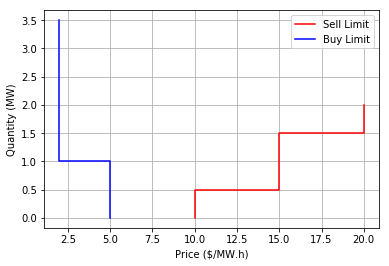

In [5]:
market.bid(quantity=1.5,duration=1.0,price=11.0)
print(market)
market.plot()

## Filling Market Orders
A market order is filled immediately using the corresponding book. If an order is divisible, then it may be only partly filled and the balance of the order is canceled. If the order is indivisible and it cannot be completely filled, then it is canceled.

### Examples

In [6]:
# TODO

# Order Duration

When an order has mismatched duration, the dispatch must be updated when the time elapsed.  For example, if seller A places an order with a duration of 30 minutes, while matched buyer B's order lasts 1 hour, then the buyer order must be reinstated to find a new matching seller for the unfilled balance of the 30 minutes.

### Examples

In [7]:
# TODO